In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    "pgf.rcfonts": False,
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    #"font.sans-serif": "Computer Modern Sans serif",
    #"font.serif": [],      
    "font.sans-serif": [],
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import quad
from scipy.special import gamma

In [91]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
col_names = ['slug', 'wien', 'asym', 'asym_err', 'asym_n', 'precession', 'wien_state', 'ihwp']

In [23]:
md1pos = pd.read_csv('../database_extraction/data/al_md1pos.csv', header=None, names=col_names)
md1neg = pd.read_csv('../database_extraction/data/al_md1neg.csv', header=None, names=col_names)
md2pos = pd.read_csv('../database_extraction/data/al_md2pos.csv', header=None, names=col_names)
md2neg = pd.read_csv('../database_extraction/data/al_md2neg.csv', header=None, names=col_names)
md3pos = pd.read_csv('../database_extraction/data/al_md3pos.csv', header=None, names=col_names)
md3neg = pd.read_csv('../database_extraction/data/al_md3neg.csv', header=None, names=col_names)
md4pos = pd.read_csv('../database_extraction/data/al_md4pos.csv', header=None, names=col_names)
md4neg = pd.read_csv('../database_extraction/data/al_md4neg.csv', header=None, names=col_names)
md5pos = pd.read_csv('../database_extraction/data/al_md5pos.csv', header=None, names=col_names)
md5neg = pd.read_csv('../database_extraction/data/al_md5neg.csv', header=None, names=col_names)
md6pos = pd.read_csv('../database_extraction/data/al_md6pos.csv', header=None, names=col_names)
md6neg = pd.read_csv('../database_extraction/data/al_md6neg.csv', header=None, names=col_names)
md7pos = pd.read_csv('../database_extraction/data/al_md7pos.csv', header=None, names=col_names)
md7neg = pd.read_csv('../database_extraction/data/al_md7neg.csv', header=None, names=col_names)
md8pos = pd.read_csv('../database_extraction/data/al_md8pos.csv', header=None, names=col_names)
md8neg = pd.read_csv('../database_extraction/data/al_md8neg.csv', header=None, names=col_names)

In [51]:
sc = pd.read_csv('../beamline_background/data/al_md_uslumi_asymmetries.csv', usecols=[9],names=['sc'])

In [18]:
def pmtdd(pos, neg):
    return pos-neg
def pmtdderr(pos_err, neg_err):
    return np.sqrt(np.square(pos_err) + np.square(neg_err))

In [40]:
def ewavg(value, error):
    avg, sow = np.average(value, weights=1/np.square(error), returned=True)
    err = 1.0/np.sqrt(sow)
    return avg, err

In [85]:
def calc_chi2(fit, data, err, dof):
    chi2 = np.sum(np.square(data-fit)/np.square(err))
    return chi2, chi2/dof

def chi2probdistribution(chi2, dof):
    if chi2 > 0:
        num = np.power(chi2,(dof-2.0)/2.0)*np.exp(-chi2/2.0)
        dem = np.power(2.0,(dof/2.0))*gamma(dof/2.0)
        return num/dem
    elif chi2 == 0:
        return 0
    else:
        print('Chi^2 values < 0 not valid!')
        
def calc_chi2prob(chi2, dof):
    return quad(chi2probdistribution, chi2, np.inf, (dof))

In [69]:
md1_pmtdd = pmtdd(sc.sc*md1pos.asym, sc.sc*md1neg.asym)
md1_pmtdd_err = pmtdderr(md1pos.asym_err, md1neg.asym_err)
md2_pmtdd = pmtdd(sc.sc*md2pos.asym, sc.sc*md2neg.asym)
md2_pmtdd_err = pmtdderr(md2pos.asym_err, md2neg.asym_err)
md3_pmtdd = pmtdd(sc.sc*md3pos.asym, sc.sc*md3neg.asym)
md3_pmtdd_err = pmtdderr(md3pos.asym_err, md3neg.asym_err)
md4_pmtdd = pmtdd(sc.sc*md4pos.asym, sc.sc*md4neg.asym)
md4_pmtdd_err = pmtdderr(md4pos.asym_err, md4neg.asym_err)
md5_pmtdd = pmtdd(sc.sc*md5pos.asym, sc.sc*md5neg.asym)
md5_pmtdd_err = pmtdderr(md5pos.asym_err, md5neg.asym_err)
md6_pmtdd = pmtdd(sc.sc*md6pos.asym, sc.sc*md6neg.asym)
md6_pmtdd_err = pmtdderr(md6pos.asym_err, md6neg.asym_err)
md7_pmtdd = pmtdd(sc.sc*md7pos.asym, sc.sc*md7neg.asym)
md7_pmtdd_err = pmtdderr(md7pos.asym_err, md7neg.asym_err)
md8_pmtdd = pmtdd(sc.sc*md8pos.asym, sc.sc*md8neg.asym)
md8_pmtdd_err = pmtdderr(md8pos.asym_err, md8neg.asym_err)

In [70]:
avg_pmtdd = np.array([ewavg(md1_pmtdd, md1_pmtdd_err),
                      ewavg(md2_pmtdd, md2_pmtdd_err),
                      ewavg(md3_pmtdd, md3_pmtdd_err),
                      ewavg(md4_pmtdd, md4_pmtdd_err),
                      ewavg(md5_pmtdd, md5_pmtdd_err),
                      ewavg(md6_pmtdd, md6_pmtdd_err),
                      ewavg(md7_pmtdd, md7_pmtdd_err),
                      ewavg(md8_pmtdd, md8_pmtdd_err)])

In [71]:
avg_pmtdd[:,0]

array([ 0.50702315,  0.49240404, -0.10237778,  0.1768599 ,  0.32778455,
        0.38933174,  0.64965263,  0.55138653])

In [75]:
tot_avg = ewavg(avg_pmtdd[:,0], avg_pmtdd[:,1])

In [101]:
tot_avg

(0.37442861817378675, 0.10635516353690645)

In [87]:
tot_chi2, tot_rchi2 = calc_chi2(tot_avg[0]*np.ones(8), avg_pmtdd[:,0], avg_pmtdd[:,1], 7)
tot_prob = calc_chi2prob(tot_chi2, 7)

In [89]:
tot_rchi2, tot_prob[0]

(0.6571527318217789, 0.7086361663142039)

In [73]:
md_number = np.arange(1,9,1)

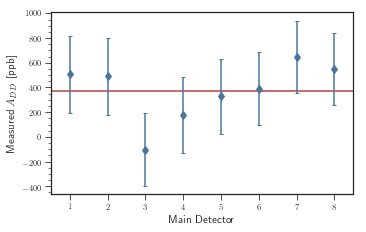

In [100]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(md_number,
            avg_pmtdd[:,0]*1000.0,
            yerr=avg_pmtdd[:,1]*1000.0,
            ls='None',
            marker='d',
            capsize=2,
            capthick=1,
            barsabove=True,
            color=sns.xkcd_rgb['dull blue'])
ax.plot(np.array([0.5, 8.5]), 
        1000.0*tot_avg[0]*np.ones(2), 
        ls='-', 
        color=sns.xkcd_rgb['dull red'], zorder=1)
ax.set_xlabel('Main Detector')
ax.set_ylabel('Measured $A_{DD}$ [ppb]')
ax.set_xlim(0.5, 8.5)
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
plt.savefig('plots/al_pmt_dd.pdf', bbox_inches='tight')
plt.savefig('plots/al_pmt_dd.pgf', bbox_inches='tight')
plt.savefig('plots/al_pmt_dd.png', bbox_inches='tight')
plt.show()